# Project 2 Model Classification
### Serena Shah | ss94574
## Part 1

We first import necessary libraries and and loading the data into a Pandas dataframe.

In [496]:
import pandas as pd
import numpy as np

# read in data
bc = pd.read_csv('data/project2.data')

We now identify the shape and size of the raw data.

In [497]:
# data shape
bc.shape

(286, 10)

In [498]:
# data size
bc.size

2860

Next we look at information about the data types of the data columns.

In [499]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


The non-null counts for all variables aligns with the length of the dataframe: 286. This indicates there are no NaN or missing values to account for in preprocessing on first look. Further investigation shows questionable values in the `node-caps` and `breast-quad` columns.

In [500]:
bc['node-caps'].unique()

array(['no', 'yes', '?'], dtype=object)

In [501]:
bc['breast-quad'].unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
      dtype=object)

There are `?` values in both the `node-caps` and `breast-quad` columns. These need to be replaced with their most frequent value, or the mode of the column.

In [502]:
# replace ? with the mode for breast-quad and node-caps
bc['breast-quad'] = bc['breast-quad'].replace('?', bc['breast-quad'].mode()[0])
bc['node-caps'] = bc['node-caps'].replace('?', bc['node-caps'].mode()[0])

Now we can see that the `?` values no longer exist for each column below.

In [503]:
bc['breast-quad'].unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central'],
      dtype=object)

In [504]:
bc['node-caps'].unique()

array(['no', 'yes'], dtype=object)

Now we'll look into variable datatypes.

In [505]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


Other than the `deg-malig` variable, which is of `int` type, all variables in the breast cancer dataset are of `object` types. Let's get a better idea of the reported value formats for each variable.

In [506]:
bc.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


All variables require a conversion to `category` type and then `bool` type (bit) through one-hot encoding. The `class` variable, however, is the independent variable we will be trying to predict with classification models, so we will leave that as a `category` datatype.

First we'll cast the column values to categories.

In [507]:
# cast column vals to type category
bc['class'] = bc['class'].astype("category")
bc['age'] = bc['age'].astype("category")
bc['menopause'] = bc['menopause'].astype("category")
bc['tumor-size'] = bc['tumor-size'].astype("category")
bc['inv-nodes'] = bc['inv-nodes'].astype("category")
bc['node-caps'] = bc['node-caps'].astype("category")
bc['breast'] = bc['breast'].astype("category")
bc['breast-quad'] = bc['breast-quad'].astype("category")
bc['irradiat'] = bc['irradiat'].astype("category")

bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        286 non-null    category
 1   age          286 non-null    category
 2   menopause    286 non-null    category
 3   tumor-size   286 non-null    category
 4   inv-nodes    286 non-null    category
 5   node-caps    286 non-null    category
 6   deg-malig    286 non-null    int64   
 7   breast       286 non-null    category
 8   breast-quad  286 non-null    category
 9   irradiat     286 non-null    category
dtypes: category(9), int64(1)
memory usage: 6.6 KB


We can see that all categorical type columns have been converted to type `category`. Before one-hot encoding, we will perform univariate analysis on the dataset through visualization.

In [508]:
# import necessary libs
import seaborn as sns
import matplotlib.pyplot as plt

We'll first visualize the count for each menopause status (either `premeno`, `ge40`, or `lt40`) for breast cancer patients.

Text(0.5, 0, 'Menopause Status')

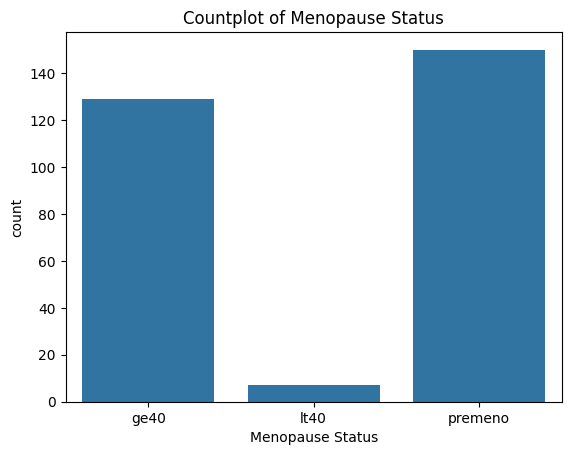

In [509]:
# countplot of menopause status
sns.countplot(x=bc['menopause'])
plt.title("Countplot of Menopause Status")
plt.xlabel("Menopause Status")

Next we'll visualize the count for the breast location with cancer.

Text(0.5, 0, 'Breast')

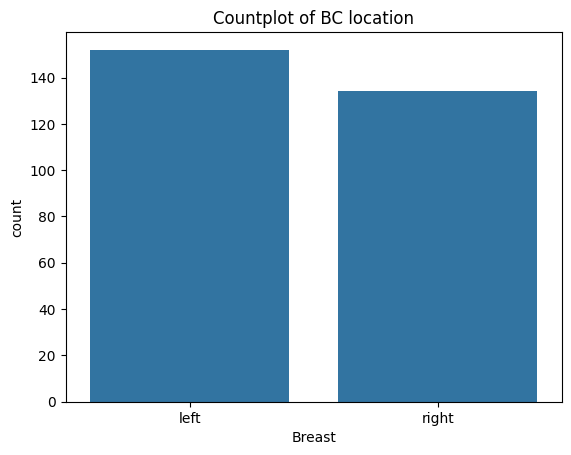

In [510]:
# countplot of BC location
sns.countplot(x=bc['breast'])
plt.title("Countplot of BC location")
plt.xlabel("Breast")

It seems that breast cancer tumors are marginally more present in the left breast than the right with about 150 counts in the left breast and about 130 counts in the right. 

Lastly, we'll visualize the ranges for tumor size in breast cancer patients.

Text(0.5, 0, 'count')

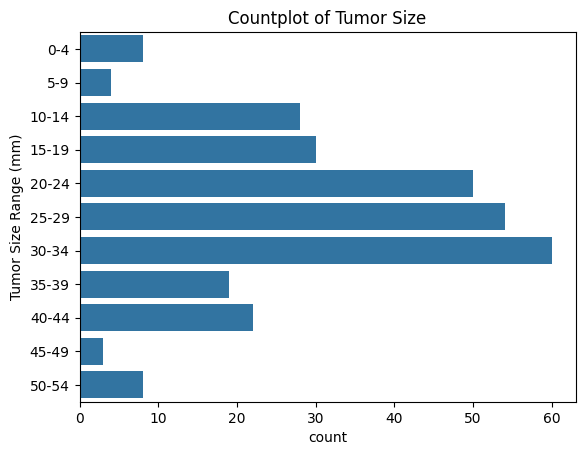

In [511]:
# count of tumor size range
category_order = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54']
sns.countplot(data=bc['tumor-size'], order=category_order)
plt.title("Countplot of Tumor Size")
plt.ylabel("Tumor Size Range (mm)")
plt.xlabel("count")

The countplot's distribution is fairly normal, though slightly skewed negative. It seems that tumor ranges are most often between 20 and 34 mm. 

Now that we've visualized the data through univariate analyses, we can convert our non-ordinal categorical columns to bits to improve the performance of our machine learning model to be instantiated later.

In [512]:
# categorical to bit conversion
bc = pd.get_dummies(bc, columns=["class", "menopause", "age", "tumor-size", "inv-nodes", "node-caps", "breast", "breast-quad", "irradiat"], drop_first=True)
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   deg-malig                286 non-null    int64
 1   class_recurrence-events  286 non-null    bool 
 2   menopause_lt40           286 non-null    bool 
 3   menopause_premeno        286 non-null    bool 
 4   age_30-39                286 non-null    bool 
 5   age_40-49                286 non-null    bool 
 6   age_50-59                286 non-null    bool 
 7   age_60-69                286 non-null    bool 
 8   age_70-79                286 non-null    bool 
 9   tumor-size_10-14         286 non-null    bool 
 10  tumor-size_15-19         286 non-null    bool 
 11  tumor-size_20-24         286 non-null    bool 
 12  tumor-size_25-29         286 non-null    bool 
 13  tumor-size_30-34         286 non-null    bool 
 14  tumor-size_35-39         286 non-null    bool 
 15  tumor-

We can see that each variable with *n* categories has been split into *n-1* columns.

# Part 2 

We will now begin building and assessing a model to predict reccurence of breast cancer in patients. First we will split the data in to testing and training sets. The reccurrence status of breast cancer is our independent variable and our dependent variables are all other columns provided in the dataset.

In [513]:
# x are the dependent variables and y is the target variable
X = bc.drop('class_recurrence-events', axis=1)
y = bc['class_recurrence-events']

# import lib to split data
from sklearn.model_selection import train_test_split

# splitting the data in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

X_train.shape

(200, 31)

In [514]:
X_test.shape

(86, 31)

Now we will perform classification using supervised learning techniques: K-Nearest Neighbor Classifier, Random Forest Classifier, and Decision Trees.

### K-Nearest Neighbor Classifier

In [515]:
# import knn classifier function
from sklearn.neighbors import KNeighborsClassifier

Instead of setting our *k* value with a guess, we will search for the optimal *k* hyperparameter.

In [516]:
# we do not pass a value for k here
knn_search_recall = KNeighborsClassifier()

# dict of vals to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 100)}

We will perform cross-validation on the data to find the optimal hyperparameter *k*, using a fold count of 5. 

In [530]:
# instantiate gridsearchCV object with 5 folds
from sklearn.model_selection import GridSearchCV
knn_gscv = GridSearchCV(knn_search_recall, param_grid, cv=5)

# for each parameter in our param_grid, for each possible value,
# fit model to data using cv folds and compute the accuracy
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

Now that our model has been fit using the cross-validation grid, the `sklearn` lib can output the optimal *k* value for our testing and training datasets.

In [532]:
# check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 14}

In [533]:
best_knn = knn_gscv.best_estimator_

It seems that the optimal *k* number of neighbors to use for our model is 14. Let's look at how our model performed in accuracy, recall, precision, and F1 scoring. Its performance on the testing set will tell us about its predictive abilities and its performance on the training set will tell us if there was a potential overfitting to the training data.

In [538]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

recall_test = recall_score(y_test, best_knn.predict(X_test))
recall_train = recall_score(y_train, best_knn.predict(X_train))

accuracy_test = accuracy_score(y_test, best_knn.predict(X_test))
accuracy_train = accuracy_score(y_train, best_knn.predict(X_train))

precision_test = precision_score(y_test, best_knn.predict(X_test))
precision_train = precision_score(y_train, best_knn.predict(X_train))

f1_test = f1_score(y_test, best_knn.predict(X_test))
f1_train = f1_score(y_train, best_knn.predict(X_train))

print(f'Recall of {best_knn} on test data is : {recall_test}')
print(f'Recall of {best_knn} on train data is : {recall_train}\n')
print(f'Accuracy of {best_knn} on test data is : {accuracy_test}')
print(f'Accuracy of {best_knn} on train data is : {accuracy_train}\n')
print(f'Precision of {best_knn} on test data is : {precision_test}')
print(f'Precision of {best_knn} on train data is : {precision_train}\n')
print(f'F1 of {best_knn} on test data is : {f1_test}')
print(f'F1 of {best_knn} on train data is : {f1_train}')


Recall of KNeighborsClassifier(n_neighbors=14) on test data is : 0.038461538461538464
Recall of KNeighborsClassifier(n_neighbors=14) on train data is : 0.15254237288135594

Accuracy of KNeighborsClassifier(n_neighbors=14) on test data is : 0.6976744186046512
Accuracy of KNeighborsClassifier(n_neighbors=14) on train data is : 0.745

Precision of KNeighborsClassifier(n_neighbors=14) on test data is : 0.5
Precision of KNeighborsClassifier(n_neighbors=14) on train data is : 0.9

F1 of KNeighborsClassifier(n_neighbors=14) on test data is : 0.07142857142857142
F1 of KNeighborsClassifier(n_neighbors=14) on train data is : 0.2608695652173913
